# Introduction to Keras and TensorFlow

## 3.1 What's TensorFlow?

## 3.2 What's Keras?

## 3.3 Keras and TensorFlow: A brief history

## 3.4 Setting up a deep learning workspace

### 3.4.1 Jupyter notebooks: The preferred way to run deep learning experiments

### 3.4.2 Using Colaboratory

## 3.5 First steps with TensorFlow

### 3.5.1 Constant tensors and variables

**All-ones or all-zeros tensors**

In [2]:
import tensorflow as tf
x = tf.ones(shape=(3, 4))
print(x)

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


2022-01-13 22:28:29.994898: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 22:28:29.995568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 22:28:30.001031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 22:28:30.001724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 22:28:30.002339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [3]:
x = tf.zeros(shape=(2, 3))
print(x)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


**Random tensors**

In [4]:
x = tf.random.normal(shape=(2, 3), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.13963754 -0.34801134 -0.3296822 ]
 [-0.909544   -1.6415131  -1.0114537 ]], shape=(2, 3), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(2, 3), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.8180008  0.12214148 0.67301965]
 [0.6642209  0.84336245 0.936509  ]], shape=(2, 3), dtype=float32)


Numpy arrays와 TensorFlow tensors 사이의 가장 큰 차이는 numpy array는 값 할당이 가능하지만 tensorflow tensor는 값 할당을 할 수 없음

**Numpy arrays are asignable**

In [6]:
import numpy as np
x = np.ones(shape=(2, 3))
print(x)
x[0, 0] = 0.
print(x)

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 1. 1.]
 [1. 1. 1.]]


**TensorFlow tensors are not asignable**

In [7]:
x = tf.ones(shape=(2, 3))
print(x)
x[0, 0] = 0

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

**Creating a TensorFlow variable**

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(2, 3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[-1.4618121 , -0.47201815,  0.54977477],
       [ 0.51001465,  0.30318165, -1.0229608 ]], dtype=float32)>


variale의 상태는 assign 메소드를 사용해서 변경할 수 있음

In [9]:
v.assign(tf.ones(shape=(2, 3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


**Assigning a value to a subset of a TensorFlow variable**

In [10]:
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


```assign_add(), assign_sub()``` 는 각각 ```+=, -=```와 동일한 연산 수행

In [11]:
v.assign_add(tf.ones(shape=(2, 3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[4., 2., 2.],
       [2., 2., 2.]], dtype=float32)>


### 3.5.2 Tensor operations: Doing math in TensorFlow

Numpy와 마찬가지로 TensorFlow도 다양한 수식을 표현하기 위한 다양한 텐서 연산자를 제공

**A few basic math operations**

In [12]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

TensorFlow도 Numpy와 마찬가지로 실행 시점에 바로 결과를 확인할 수 있음(eager execution이라고 함)

## 3.5.3 A second look at the GradientTape API

**Using the `GradientTape`**

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


- `gradients = tape.gradient(loss, weights)` 모델의 loss에 대한 기울기를 구하는 가장 일반적인 방법
- trainable variables만 기본적으로 추적 함. 상수에 대해서는 `tape.watch()` 호출해서 추적이 가능하도록 해줘야 함

**Using `GradientTape` with constant tensor inputs**

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [15]:
time = tf.Variable(0.3)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time **2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(2.9400005, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## 3.5.4 An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [16]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
print(negative_samples.shape)
print(positive_samples.shape)

(1000, 2)
(1000, 2)


In [17]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

(2000, 2)


In [18]:
labels = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")
))
print(labels.shape)

(2000, 1)


**Plotting the two point classes**

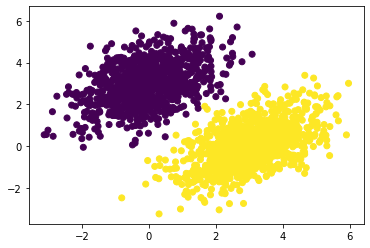

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels[:, 0])
plt.show()

**Creating the linear classifier variables**

In [20]:

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))

**The forward pass function**

In [21]:
def model(inputs):
    # prediction = W * input + b
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [22]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [23]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    # gradient computation
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # update weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(40):
    loss = training_step(inputs, labels)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.5368
Loss at step 1: 0.8156
Loss at step 2: 0.2450
Loss at step 3: 0.1463
Loss at step 4: 0.1237
Loss at step 5: 0.1139
Loss at step 6: 0.1065
Loss at step 7: 0.1000
Loss at step 8: 0.0941
Loss at step 9: 0.0886
Loss at step 10: 0.0836
Loss at step 11: 0.0790
Loss at step 12: 0.0748
Loss at step 13: 0.0708
Loss at step 14: 0.0672
Loss at step 15: 0.0639
Loss at step 16: 0.0609
Loss at step 17: 0.0580
Loss at step 18: 0.0554
Loss at step 19: 0.0531
Loss at step 20: 0.0509
Loss at step 21: 0.0488
Loss at step 22: 0.0470
Loss at step 23: 0.0453
Loss at step 24: 0.0437
Loss at step 25: 0.0422
Loss at step 26: 0.0409
Loss at step 27: 0.0396
Loss at step 28: 0.0385
Loss at step 29: 0.0375
Loss at step 30: 0.0365
Loss at step 31: 0.0356
Loss at step 32: 0.0348
Loss at step 33: 0.0340
Loss at step 34: 0.0334
Loss at step 35: 0.0327
Loss at step 36: 0.0321
Loss at step 37: 0.0316
Loss at step 38: 0.0311
Loss at step 39: 0.0306


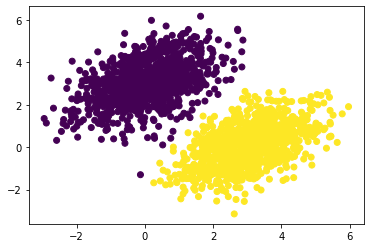

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0] > 0.5)
plt.show()

`predictions == [[w1], [w2]] * [x, y] + b == w1*x + w2*y + b`

`y = -(w1/w2)*x + (0.5-b)/w2`

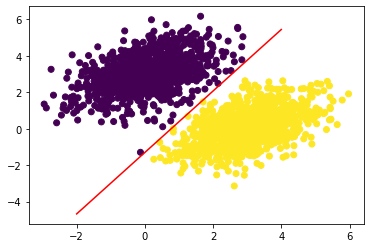

In [ ]:
x = np.linspace(-2, 4, 200)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0] > 0.5)

# 3.6 Anatomy of a neural network: Understanding core Keras APIs

지금까지 배운 내용은 가장 기본적인 TensorFlow와 TensorFlow를 사용한 장난감 모델The batch linear classifer을 바닥부터 만들어 봤고, 2장에서는 장난감 뉴럴넷을 만들어 봤다. 이번 장에서는 Keras API에 대해서 알아 본다.

## 3.6.1 Layers: The building blocks of deep learning

- 뉴럴넷에서 가장 기본적인 구조는 layer
- layer는 tensor 를 입력 받아 tensor를 출력하는 데이터 처리 모듈
- layer는 weight를 저장하고 있고 이런 weights를 stochastic gradient descent를 통해서 학습을 진행
- 입력 데이터에 따라 다양한 형태의 layer가 존재함(Dense class, LSTM Layer, Conv1D, Conv2D 등)
- Deep Learning model은 서로 호환 가능한 layer를 엮어서 구성

### The Base Layer Class in Keras

- Layer는 일부 weights 와 계산(a forward pass)을 추상화한 객체
- weights는 build() 메서드를 호출하면 정의가 되고 call() 메서드를 호출하면 weight가 계산 됨

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


## 3.6.2 From layers to models

- 딥러닝 모델은 레이어들의 그래프 형태
- keras에서는 Model class 
- sequential model은 Model의 자식 클래스
- 하나의 입력을 하나의 출력으로 매핑한 모델
- 이 외에 Two-branch networks, Multihead networks, Residual connections 등과 같은 복잡한 형태의 모델
- keras에서는 두 가지 형태로 모델을 생성할 수 있음
- Model class를 직접 상속해서 자식 클래스를 구현하는 방법
- keras가 제공하는 API를 사용해서 구현하는 방법

## 3.6.3 The "compile" step: Configuring the learning process

- 모델 구조가 정의되고 나면 세 가지를 더 선택 해야 함
- Loss function, Optimizer, Metrics
- Loss function(objective function): 학습 과정에서 최소화 되어야 하는 에러.(정답과 모델이 예측한 결과의 차이)
- Optimizer: Loss function에 기반해서 네트워크가 어떻게 업데이트 될 것인지 결정
- Metrics: 학습과 검증 과정에서 성능 측정을 위한 지표 설정
- 설정을 완료하면 `compile()` 메소드와 `fit()` 메소드를 사용해서 모델을 생성하고 학습을 진행

In [27]:
from tensorflow import keras
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

## 3.6.4 Picking a loss function

- 문제에 적합한 loss를 선택하는 것은 매우 중요함


## 3.6.5 Understanding the fit() method

- `fit()` 메서드는 training loop를 구현한 함수

In [29]:
history = model.fit(
    inputs,
    labels,
    epochs=5,
    batch_size=128)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 3.7155 - binary_accuracy: 0.0160
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 3.4942 - binary_accuracy: 0.0165
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 3.3090 - binary_accuracy: 0.0170
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 3.1319 - binary_accuracy: 0.0180
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 2.9615 - binary_accuracy: 0.0205


In [30]:
history.history

{'loss': [3.715461254119873,
  3.494199275970459,
  3.308974266052246,
  3.1319081783294678,
  2.9614508152008057],
 'binary_accuracy': [0.01600000075995922,
  0.016499999910593033,
  0.017000000923871994,
  0.017999999225139618,
  0.020500000566244125]}

## 3.6.6 Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [33]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = labels[indices_permutation]

num_validation_samples = int(0.3*len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets))

Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4404 - binary_accuracy: 0.8729 - val_loss: 0.0287 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0717 - binary_accuracy: 0.9557 - val_loss: 0.0837 - val_binary_accuracy: 0.9950
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0706 - binary_accuracy: 0.9571 - val_loss: 0.0326 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0676 - binary_accuracy: 0.9629 - val_loss: 0.1161 - val_binary_accuracy: 0.9667
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0753 - binary_accuracy: 0.9521 - val_loss: 0.1072 - val_binary_accuracy: 0.9650


- validation data에 대한 loss 값을 validation loss라고 함
- validation loss와 metrics를 확인하고 싶으면 `evaluate()` 메소드 사용

```python
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)
```

## 3.6.7 Inference: Using a model after training

- 학습 완료한 모델을 새로운 데이터를 사용해서 예측하는 과정 (inference)
- inference하는 가장 쉬운 방법 `__call__()`를 호출 하는 것

```python
predictions = model(new_inputs)
```

- `predict()` 메소드를 호출해서 inference 수행
- 배치 단위로 inference를 수행하고 numpy array로 예측 결과를 반환

```python
predictions = model.predict(new_inputs, batch_size=128)
```

In [35]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.3867824 ]
 [ 0.24549565]
 [-0.07340419]
 [ 1.429017  ]
 [ 0.10328305]
 [ 0.03769994]
 [ 1.2583144 ]
 [ 1.3127971 ]
 [ 0.38604647]
 [ 0.2854563 ]]
